In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Applying SVM model on Text

In [ ]:
data_train=pd.read_csv("/content/drive/MyDrive/Deep Learning/FakeNewsFinalDataset/CSV/Train.csv")

In [ ]:
data_val=pd.read_csv("/content/drive/MyDrive/Deep Learning/FakeNewsFinalDataset/CSV/Test.csv")

In [ ]:
data_train.head()

,Unnamed: 0,index,main_img_url,text,title,type
0,0,1,https://static01.nyt.com/images/2016/11/23/us/...,"They stood in line at Trump Tower, sometimes u...","At Donald Trump<U+2019>s Properties, a Showcas...",real
1,1,2,https://static01.nyt.com/images/2016/10/18/us/...,Donald J. Trump <U+2019>s foundation informed ...,Trump Foundation Tells New York It Has Stopped...,real
2,2,3,https://static01.nyt.com/images/2016/11/12/us/...,President-elect Donald J. Trump won the White ...,"Donald Trump Prepares for White House Move, bu...",real
3,3,4,https://static01.nyt.com/images/2016/10/21/bus...,An investment pitch for a new Texas hotel is t...,Luring Chinese Investors With Trump<U+2019>s N...,real
4,4,5,https://static01.nyt.com/images/2016/11/21/us/...,President-elect Donald J. Trump <U+2019>s wife...,Melania and Barron Trump Won<U+2019>t Immediat...,real


In [ ]:
data_val.head()

,Unnamed: 0,index,main_img_url,text,title,type
0,2001,2002,https://si.wsj.net/public/resources/images/BN-...,America<U+2019>s Founding Fathers were determi...,Only Hillary Clinton Is Prepared for the Nucle...,real
1,2002,2003,https://si.wsj.net/public/resources/images/BN-...,"LVIV, Ukraine<U+2014>American military leaders...",U.S. Military Reassures on Commitment to Europ...,real
2,2003,2004,https://si.wsj.net/public/resources/images/BN-...,"STOCKTON, Calif.<U+2014>Forget about the Hilla...","Farmer Takes on State, Labor and Business Inte...",real
3,2004,2005,https://si.wsj.net/public/resources/images/BN-...,"TAMPA, Fla.<U+2014>Republican presidential nom...",Donald Trump Says He Can Challenge Hillary Cli...,real
4,2005,2006,https://si.wsj.net/public/resources/images/BN-...,Hillary Clinton may win the election in two we...,The FBI<U+2019>s Clinton Probe Gets Curiouser ...,real


In [ ]:
X1=data_train.drop(labels=['Unnamed: 0','main_img_url','type'], axis = 1)
X1.head()

,index,text,title
0,1,"They stood in line at Trump Tower, sometimes u...","At Donald Trump<U+2019>s Properties, a Showcas..."
1,2,Donald J. Trump <U+2019>s foundation informed ...,Trump Foundation Tells New York It Has Stopped...
2,3,President-elect Donald J. Trump won the White ...,"Donald Trump Prepares for White House Move, bu..."
3,4,An investment pitch for a new Texas hotel is t...,Luring Chinese Investors With Trump<U+2019>s N...
4,5,President-elect Donald J. Trump <U+2019>s wife...,Melania and Barron Trump Won<U+2019>t Immediat...


In [ ]:
X2=data_val.drop(labels=['Unnamed: 0','main_img_url','type'], axis = 1)
X2.head()

,index,text,title
0,2002,America<U+2019>s Founding Fathers were determi...,Only Hillary Clinton Is Prepared for the Nucle...
1,2003,"LVIV, Ukraine<U+2014>American military leaders...",U.S. Military Reassures on Commitment to Europ...
2,2004,"STOCKTON, Calif.<U+2014>Forget about the Hilla...","Farmer Takes on State, Labor and Business Inte..."
3,2005,"TAMPA, Fla.<U+2014>Republican presidential nom...",Donald Trump Says He Can Challenge Hillary Cli...
4,2006,Hillary Clinton may win the election in two we...,The FBI<U+2019>s Clinton Probe Gets Curiouser ...


In [ ]:
y_train=data_train['type']
y_train.head(5)

0    real
1    real
2    real
3    real
4    real
Name: type, dtype: object

In [ ]:
y_val=data_val['type']
y_val.head(5)

0    real
1    real
2    real
3    real
4    real
Name: type, dtype: object

In [ ]:
y_train.value_counts(),y_val.value_counts()

(real    1603
 fake    1233
 Name: type, dtype: int64, real    541
 fake    456
 Name: type, dtype: int64)

In [ ]:
mes1=X1.copy()
mes1.title[0]

'At Donald Trump<U+2019>s Properties, a Showcase for a Brand and a President-Elect'

In [ ]:
mes2=X2.copy()
mes2.title[0]

'Only Hillary Clinton Is Prepared for the Nuclear Threat - WSJ'

Data Preprocessing

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
    text = re.sub(r"<U\+2019>|<U\+2018>", "\'", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " had ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\'t", " not", text)
    text= re.sub(r"<U\+.+>",' ',text)
    text = re.sub(r"[\!\?\.\,\+\-\$\%\^\>\<\=\:\;\*\(\)\{\}\[\]\/\~\&\|]", " ", text)
    return text

In [ ]:
corpus1=[]
words1=[]
for i in range(len(mes1)):
  review=clean_text(mes1['title'][i])
  review.lower()
  review=review.split()
  review=[word for word in review if word.isalpha()]
  review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
  for word in review:
    if word not in words1:
      words1.append(word)
  review=' '.join(review).strip()
  if len(review)==0:
    review='no text'
  corpus1.append(review)

In [ ]:
corpus2=[]
words2=[]
for i in range(len(mes2)):
  review=clean_text(mes2['title'][i])
  review.lower()
  review=review.split()
  review=[word for word in review if word.isalpha()]
  review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
  for word in review:
    if word not in words2:
      words2.append(word)
  review=' '.join(review).strip()
  if len(review)==0:
    review='no text'
  corpus2.append(review)

In [ ]:
corpus1

['At donald properti showcas brand presid elect',
 'trump foundat tell new york It ha stop solicit after state order',
 'donald trump prepar white hous move hi tower may still beckon',
 'lure chines investor with name littl els',
 'melania barron trump Wo immedi move white hous',
 'ivanka presenc meet with leader rais question',
 'with trump use tower base fifth avenu grind halt',
 'donald math take hi tower greater height',
 'trump foundat Wo pay ani million univers settlement',
 'rememb when wa set trump tower',
 'trump inch toward name domest cabinet member',
 'state attorney gener order trump foundat ceas rais money new york',
 'chelsea handler relax unlik place trump tower',
 'sale trump build fall off',
 'name when place revolt',
 'donald trump lawsuit presid',
 'donald caldron conflict',
 'ethic offic prais donald trump move He ha commit To',
 'trump TV offer fledgl framework potenti media futur',
 'ivanka trump blur line between profession polit',
 'A partisan crowd watch debat

In [ ]:
corpus2

['onli hillari clinton Is prepar nuclear threat wsj',
 'U S militari reassur commit europ wsj',
 'farmer take state labor busi interest over fund california mega project wsj',
 'donald trump say He can challeng hillari clinton new state wsj',
 'the clinton probe get curious wsj',
 'vote right decis arizona new jersey favor republican wsj',
 'central bank face challeng from polit event wsj',
 'feder court ohio arizona N C issu vote rule favor democrat wsj',
 'An earli result elect angri voter wsj',
 'hillari clinton look bolster support michigan with monday visit wsj',
 'self loath off road ralli wsj',
 'novemb surpris how market are play risk anoth brexit wsj',
 'worst perform stock health care wsj',
 'missouri race like fight senat itself Is dead heat wsj',
 'A presid clinton could give germani backbon wsj',
 'donald trump make push florida wsj',
 'An island ration blue state new england wsj',
 'iran ship heavi water out countri eas nuclear conflict wsj',
 'the fragil fractur franc ws

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm 
nlp = spacy.load('en_core_web_sm')
stopwords = list(STOP_WORDS)

In [ ]:
def data_cleaning(sentence):
    doc = nlp(sentence)
    tokens=[]
    for token in doc:
        if token.lemma_ != "-PRON-":
            var = token.lemma_.lower().strip()
        else:
            var = token.lower_
        tokens.append(var)
    clean_tokens = []
    for token in tokens:
        if token not in stopwords:
            clean_tokens.append(token)
    return clean_tokens

In [ ]:
mes1["clean_text"]=corpus1

In [ ]:
mes1.head()

,index,text,title,clean_text
0,1,"They stood in line at Trump Tower, sometimes u...","At Donald Trump<U+2019>s Properties, a Showcas...",At donald properti showcas brand presid elect
1,2,Donald J. Trump <U+2019>s foundation informed ...,Trump Foundation Tells New York It Has Stopped...,trump foundat tell new york It ha stop solicit...
2,3,President-elect Donald J. Trump won the White ...,"Donald Trump Prepares for White House Move, bu...",donald trump prepar white hous move hi tower m...
3,4,An investment pitch for a new Texas hotel is t...,Luring Chinese Investors With Trump<U+2019>s N...,lure chines investor with name littl els
4,5,President-elect Donald J. Trump <U+2019>s wife...,Melania and Barron Trump Won<U+2019>t Immediat...,melania barron trump Wo immedi move white hous


In [ ]:
mes2["clean_text"]=corpus2

In [ ]:
mes2.head()

,index,text,title,clean_text
0,2002,America<U+2019>s Founding Fathers were determi...,Only Hillary Clinton Is Prepared for the Nucle...,onli hillari clinton Is prepar nuclear threat wsj
1,2003,"LVIV, Ukraine<U+2014>American military leaders...",U.S. Military Reassures on Commitment to Europ...,U S militari reassur commit europ wsj
2,2004,"STOCKTON, Calif.<U+2014>Forget about the Hilla...","Farmer Takes on State, Labor and Business Inte...",farmer take state labor busi interest over fun...
3,2005,"TAMPA, Fla.<U+2014>Republican presidential nom...",Donald Trump Says He Can Challenge Hillary Cli...,donald trump say He can challeng hillari clint...
4,2006,Hillary Clinton may win the election in two we...,The FBI<U+2019>s Clinton Probe Gets Curiouser ...,the clinton probe get curious wsj


In [ ]:
x_train=mes1["clean_text"]
y_train=data_train["type"]

In [ ]:
x_val=mes2["clean_text"]
y_val=data_val["type"]

In [ ]:
tfidf = TfidfVectorizer(tokenizer = data_cleaning)

In [ ]:
classifier = svm.SVC(kernel='linear', C=1,gamma='auto')

In [ ]:
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])

In [ ]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x7fc1ca9f7488>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0

In [ ]:
y_pred = clf.predict(x_val)

In [ ]:
accuracy_score(y_val,y_pred)

0.9047141424272819

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

        fake       1.00      0.79      0.88       456
        real       0.85      1.00      0.92       541

    accuracy                           0.90       997
   macro avg       0.92      0.90      0.90       997
weighted avg       0.92      0.90      0.90       997



VGG19 Model on Images

In [ ]:
#Importing Library
from keras.layers import Dense,Input,Flatten,Dropout
from keras.models import Model,Sequential
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Embedding,Dense,Flatten,Concatenate,Bidirectional,LSTM
from keras.layers.merge import add
from keras.utils import plot_model

In [ ]:
train_path='/content/drive/MyDrive/Deep Learning/FakeNewsFinalDataset/Train'
test_path='/content/drive/MyDrive/Deep Learning/FakeNewsFinalDataset/Test'

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg19.output)
x1=Dense(1024,activation='tanh')(x)
x2=Dense(512,activation='tanh')(x1)
x3=Dense(32,activation='tanh')(x2)

In [ ]:
prediction = Dense(1, activation='sigmoid')(x3)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

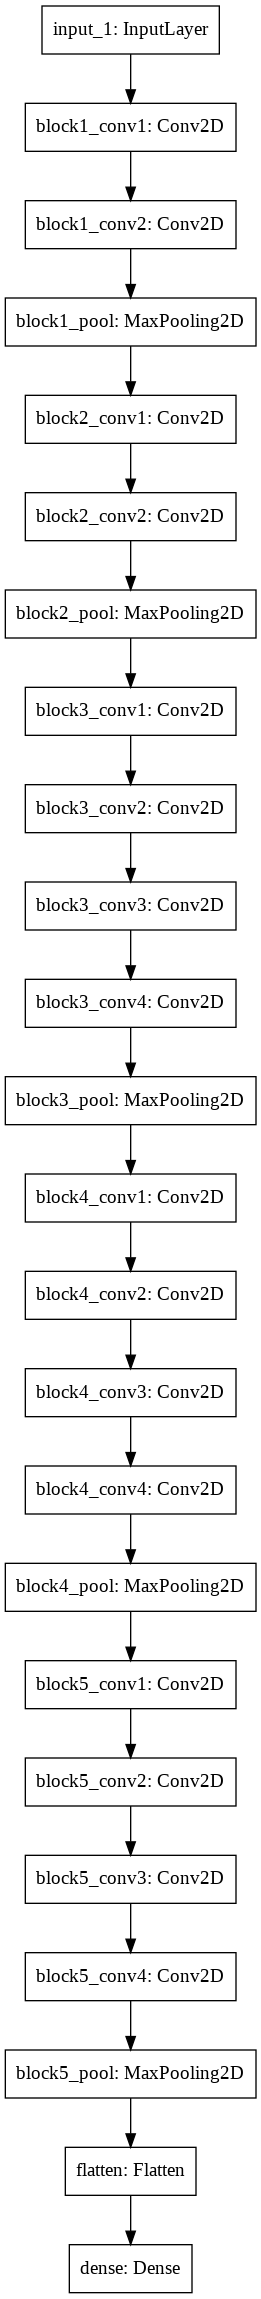

In [ ]:
plot_model(model,to_file='model.png')

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/FakeNewsFinalDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode='binary')

Found 2836 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/FakeNewsFinalDataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 997 images belonging to 2 classes.


In [ ]:
import keras
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Best_VGG_Model1.h5",save_best_only=True,monitor='val_accuracy',mode='auto',verbose=1)

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[checkpoint_cb])

Epoch 1/10
15/89 [====>.........................] - ETA: 29:35 - loss: 1.0499 - accuracy: 0.5667

In [ ]:
import keras
model=keras.models.load_model('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Best_VGG_Model1.h5')

In [ ]:
from os import listdir
fake=len(listdir('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/Test/Fake'))
real=len(listdir('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/Test/Real'))
fake,real

(456, 541)

In [ ]:
import numpy as np
y_test_fake=np.zeros(fake,dtype=int)
y_test_real=np.ones(real,dtype=int)
y_test_fake,y_test_real

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
y_test=np.concatenate((y_test_fake,y_test_real))
y_test,y_test.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
y_pred=model.predict(test_set)
y_pred

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


array([[5.16686678e-01],
       [4.82916506e-03],
       [9.03452814e-01],
       [5.57299256e-01],
       [9.06800985e-01],
       [8.39956522e-01],
       [9.53452885e-01],
       [3.08211800e-03],
       [7.71694005e-01],
       [7.91876391e-02],
       [8.25205564e-01],
       [2.96283811e-01],
       [8.24849248e-01],
       [1.23719707e-01],
       [1.21719949e-01],
       [2.01709978e-02],
       [5.01979530e-01],
       [2.61993140e-01],
       [5.55123568e-01],
       [3.41716498e-01],
       [9.15261626e-01],
       [6.52242661e-01],
       [8.08364153e-01],
       [9.94503617e-01],
       [3.67550284e-01],
       [5.22301257e-01],
       [8.35502967e-02],
       [2.12152421e-01],
       [2.68445134e-01],
       [7.37433195e-01],
       [9.68412399e-01],
       [5.56551926e-02],
       [6.54256493e-02],
       [1.77197158e-01],
       [7.90035665e-01],
       [3.54983151e-01],
       [6.58587396e-01],
       [8.14798594e-01],
       [3.09982240e-01],
       [7.25601614e-01],


In [ ]:
y_pred_test=[]
for y in y_pred:
  if y<0.5:
    y_pred_test.append(0)
  else:
    y_pred_test.append(1)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44       412
           1       0.60      0.55      0.57       585

    accuracy                           0.52       997
   macro avg       0.51      0.51      0.51       997
weighted avg       0.52      0.52      0.52       997



In [ ]:
accuracy_score(y_pred_test,y_test)

0.5105315947843531